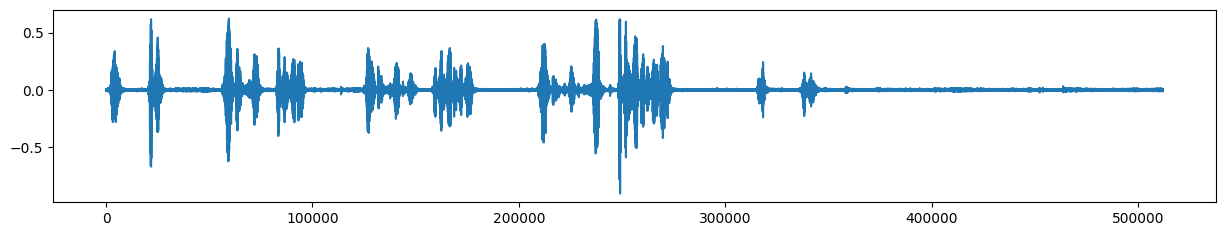

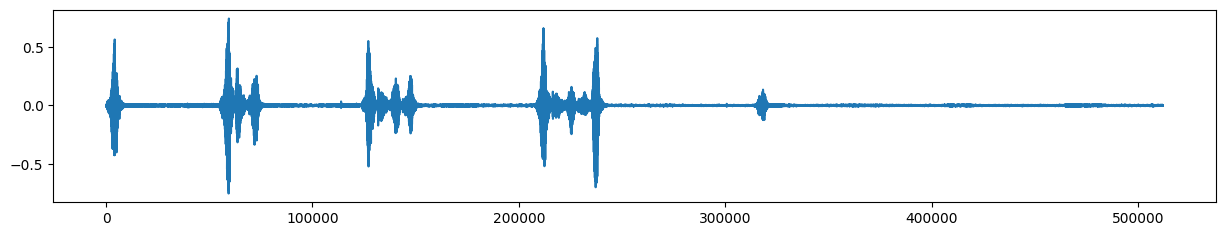

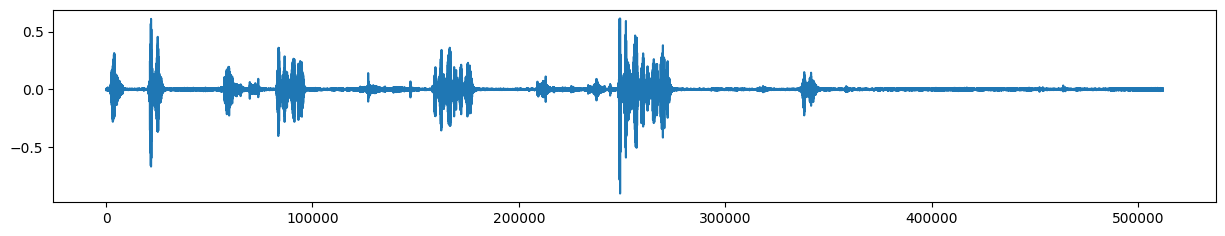

In [3]:
import numpy as np

from scipy import signal
import matplotlib.pyplot as plt

nearFd = open("nearSideSignal.dat", "r+b")
nearRaw = np.fromfile(nearFd, dtype="int16")
nearFd.close()
nearRaw = nearRaw.astype(np.float32)
nearRaw = np.divide(nearRaw, 32768)

shift = 11568
nearRaw[:(len(nearRaw)-shift)] = nearRaw[shift:]

nr, nRx = plt.subplots(figsize=(15, 2.5))
nRx.plot(nearRaw)

farFd = open("farSideSignal.dat", "r+b")
farRaw = np.fromfile(farFd, dtype="int16")
farFd.close()
farRaw = farRaw.astype(np.float32)
farRaw = np.divide(farRaw, 32768)

fr,fRx = plt.subplots(figsize=(15, 2.5))
fRx.plot(farRaw)

# freqs, times, Sx = signal.spectrogram(nearRaw, fs=16000, nperseg=1024, noverlap=512, scaling="spectrum")

# f, ax = plt.subplots(figsize=(15, 3.5))
# ax.pcolormesh(times, freqs / 1000, 10*np.log10(Sx), cmap="viridis")
# ax.set_ylabel("Frequency [kHz]")
# ax.set_xlabel("Time [s]")

import aec_core as ac

aec = ac.AEC(4096, 4096, 0.032, 0.01, 0.98)

res = aec.echoCancel(nearRaw, farRaw)
    
resPlt, resX = plt.subplots(figsize=(15,2.5))
resX.plot(res)

#for idx in range(len(nearRaw)):
#    frameSz = 1024
#    erle[idx] = sum(rawMic[idx:idx+frameSz]**2)
#    e = sum((rawMic[idx:idx+frameSz]-dMic[idx:idx+frameSz])**2)
#    if e < -0.0001 or e > 0.0001:
#        erle[idx] /= e
#    else:
#        erle[idx] = 0
